In [ ]:
from langgraph.graph import StateGraph , START , END
from langchain_groq import ChatGroq
from typing import TypedDict
from dotenv import load_dotenv


d:\Agentic AI\venv\Lib\site-packages\langchain_core\_api\deprecation.py:25: UserWarning: Core Pydantic V1 functionality isn't compatible with Python 3.14 or greater.
  from pydantic.v1.fields import FieldInfo as FieldInfoV1


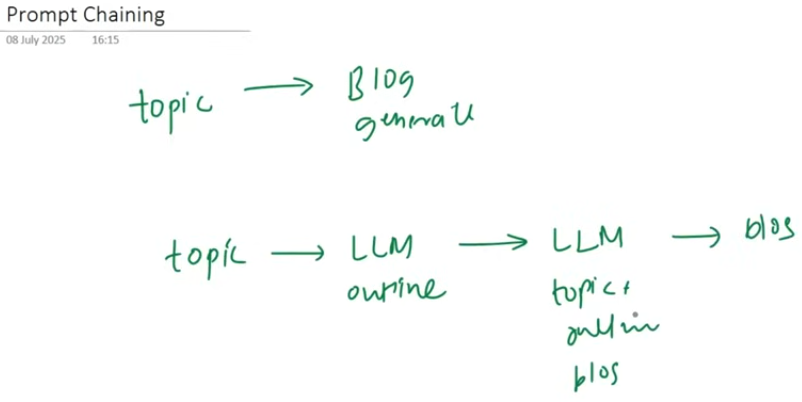
\
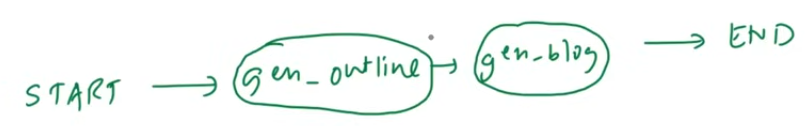

In [2]:
load_dotenv()

True

In [3]:
model = ChatGroq(model="llama-3.1-8b-instant")

In [4]:
class BlogState(TypedDict):
    title : str
    outline : str
    content: str

In [8]:
def create_outline(state:BlogState)-> BlogState:
    # fetch title
    title = state['title']  
    # genrate content from llm
    prompt = f"generate an outline for blog on the topic {title}"
    outline = model.invoke(prompt).content
    # update state
    state['outline'] = outline
    return state

def create_blog(state:BlogState)-> BlogState:
    # fetch title and content
    title = state['title']  
    outline = state['outline']
    # genrate content from llm
    prompt = f"generate a content for blog on the topic {title} with outline {outline}"
    content = model.invoke(prompt).content
    # update state
    state['content'] = content
    return state

In [9]:
graph = StateGraph(BlogState)

graph.add_node("create_outline",create_outline)
graph.add_node("create_blog",create_blog)

graph.add_edge(START,'create_outline')
graph.add_edge('create_outline','create_blog')
graph.add_edge('create_blog',END)

workflow = graph.compile()


In [11]:
initial_state  = {'title':"Rise of AI in Pakistan"}
final_state = workflow.invoke(initial_state)
print(final_state['content'])


**The Rise of AI in Pakistan: A Growing Technological Powerhouse**

**Introduction**

Artificial Intelligence (AI) has revolutionized the way businesses operate, governments function, and individuals live. From virtual assistants to self-driving cars, AI has become an integral part of our daily lives. Pakistan, with its growing tech industry and increasing focus on AI, is no exception. In this blog, we'll explore the rise of AI in Pakistan, its current state, key sectors adopting AI, government initiatives, challenges, and opportunities.

**The Current State of AI in Pakistan**

Pakistan has made significant strides in AI research and development. The country is home to several AI-focused research centers, universities, and startups. The government has launched initiatives to support AI growth, such as the Pakistan AI Policy, which aims to create a favorable environment for AI adoption and innovation. Private sector investment and talent pool have also played a crucial role in driving 